<a href="https://colab.research.google.com/github/Satyake/Getting-Started-with-TF2/blob/main/Embedding_Projector_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data()

In [ ]:
imdb_get_word_index=tf.keras.datasets.imdb.get_word_index()

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [ ]:
def mapper(dict1):
  mapper={}
  for item1, item2 in dict1.items():
    mapper[item1]=item2
  return mapper

def swapped_mapper(dict2):
  mapper2={}
  for item1,item2 in dict2.items():
    mapper2[item2]=item1
  return [mapper2[index] for index in x_train[0]]



In [ ]:
x_train_padded=tf.keras.preprocessing.sequence.pad_sequences(x_train,padding='pre')
x_test_padded=tf.keras.preprocessing.sequence.pad_sequences(x_test,padding='pre')

In [ ]:
x_train_padded.shape

(25000, 2494)

In [ ]:
swapped_mapper(imdb_get_word_index)

In [ ]:
max_index_value=max(imdb_get_word_index.values())

In [ ]:
imdb_get_word_index

In [ ]:
max_index_value

88584

In [ ]:
embedding_dim=16


In [ ]:
model=tf.keras.Sequential([
                     tf.keras.layers.Embedding(input_dim=max_index_value+3,output_dim=embedding_dim, mask_zero=False),
                     tf.keras.layers.GlobalAveragePooling1D(),
                     tf.keras.layers.Dense(units=1,activation='sigmoid')      
])

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['Accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          1417392   
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,417,409
Trainable params: 1,417,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train_padded,y_train,epochs=100, validation_split=0.2)

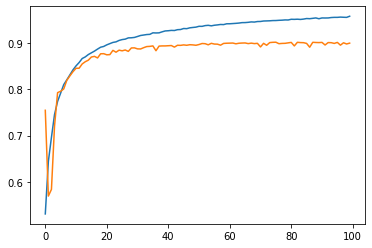

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

In [ ]:
predictions=model.predict(x_test_padded)

In [ ]:
predictions

array([[0.09798405],
       [0.99999964],
       [0.98059505],
       ...,
       [0.03569195],
       [0.11219689],
       [0.6343781 ]], dtype=float32)